## Importing Data

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [14]:
ds = pd.read_excel(r"D:\DATA_SCIENCE_COURSE\PROJECT-1\Movies_dataset_final_.xlsx")
ds = ds.sort_values(by='Year of Release')
ds

Movie Name Year of Release Duration  \
7569                Bluebeard            1901       12   
0          A Trip to the Moon            1902       13   
1     The Great Train Robbery            1903       11   
6412     An Impossible Voyage            1904       24   
6751              Karadjordje            1911       80   
...                       ...             ...      ...   
6293            Unconditional         IV 2012       92   
5540                    Split         IX 2016      117   
5822                   Jackie          V 2016      100   
5011        Far From the Tree          V 2017       93   
5015                  One Day         VI 2016      135   

                                      Genre Certificate  Movie Rating  \
7569              Short, Horror                   TV-MA           6.9   
0      Short, Action, Adventure                    TV-G           8.2   
1      Short, Action, Adventure                    TV-G           7.3   
6412   Short, Action, Adventure               Not Rated           7.5   
6751  Biography, Drama, History                     NaN           6.0   
...                                     ...         ...           ...   
6293    Biography, Crime, Drama                   PG-13           7.0   
5540           Horror, Thriller                   PG-13           7.3   
5822           Biography, Drama                       R           6.7   
5011                Documentary                 Unrated           7.7   
5015             Drama, Romance                     NaN           7.7   

      Metascore                                        Description  \
7569        NaN  A young woman becomes the eighth wife of the w...   
0           NaN  A group of astronomers go on an expedition to ...   
1           NaN  A group of bandits stage a brazen train hold-u...   
6412        NaN  Using every known means of transportation, sev...   
6751        NaN  This is the oldest found dramatic film from Se...   
...         ...                                                ...   
6293        NaN  A woman's idyllic life is shattered when her h...   
5540       63.0  Three girls are kidnapped by a man with a diag...   
5822       81.0  Following the assassination of President John ...   
5011       70.0  Based on the NY Times bestselling book by Andr...   
5015        NaN  This is a story about an IT worker called Denc...   

                                 Director  \
7569                   ['Georges Méliès']   
0                      ['Georges Méliès']   
1                     ['Edwin S. Porter']   
6412                   ['Georges Méliès']   
6751            ['Ilija Stanojevic-Cica']   
...                                   ...   
6293                   ['Brent McCorkle']   
5540               ['M. Night Shyamalan']   
5822                    ['Pablo Larraín']   
5011  ['Rachel Dretzin', 'Jamila Ephron']   
5015            ['Banjong Pisanthanakun']   

                                                  Stars    Votes   Gross  
7569  ['Georges Méliès', "Jehanne d'Alcy", 'Bleuette...    1,834     NaN  
0     ['Georges Méliès', 'Victor André', 'Bleuette B...   54,487     NaN  
1     ["Gilbert M. 'Broncho Billy' Anderson", 'A.C. ...   20,603     NaN  
6412  ['Georges Méliès', 'Fernande Albany', "Jehanne...    3,883     NaN  
6751  ['Jovan Antonijevic-Djedo', 'Teodora Arsenovic...      226     NaN  
...                                                 ...      ...     ...  
6293  ['Lynn Collins', 'Michael Ealy', 'Bruce McGill...    4,943    1.01  
5540  ['James McAvoy', 'Anya Taylor-Joy', 'Haley Lu ...  537,724  138.29  
5822  ['Natalie Portman', 'Peter Sarsgaard', 'Greta ...   82,764   13.96  
5011  ['Amy Allnutt', 'Jack Allnutt', 'Harry Burdick...      629    0.16  
5015  ['Chantavit Dhanasevi', 'Nittha Jirayungyurn',...    2,702     NaN  

[7586 rows x 12 columns]

In [15]:
#display columns
ds.columns

Index(['Movie Name', 'Year of Release', 'Duration', 'Genre', 'Certificate',
       'Movie Rating', 'Metascore', 'Description', 'Director', 'Stars',
       'Votes', 'Gross'],
      dtype='object')

In [16]:
#finding duplicates
ds.duplicated().sum()

0

## Data Transformation

In [17]:
# Before Column Transformation 
ds['Stars'][1]

'["Gilbert M. \'Broncho Billy\' Anderson", \'A.C. Abadie\', \'George Barnes\', \'Justus D. Barnes\']'

In [18]:
# Remove all non-numeric characters from 'Year of Release','Duration' and 'Votes' column
ds['Year of Release'] = ds['Year of Release'].str.replace('[^0-9]', '', regex=True)
ds['Duration'] = ds['Duration'].str.replace('[^0-9]', '', regex=True)
ds['Votes'] = ds['Votes'].str.replace('[^0-9]', '', regex=True)

# Assuming df is your DataFrame and 'directors' is the column containing the data
ds['Director'] = ds['Director'].str.replace(r'[\'\[\]]', '', regex=True)

# Remove commas from the 'Genre' column
ds['Genre'] = ds['Genre'].str.replace(',', '')

# Remove symbols, tokens, and characters except alphabets from 'Stars' column
import re
ds['Stars'] = ds['Stars'].apply(lambda x: re.sub(r'[^a-zA-Z.,\s]', '', x))

# Convert 'Year of Release','Duration' and 'Votes' to numeric
ds['Year of Release'] = pd.to_numeric(ds['Year of Release'], errors='coerce')
ds['Duration'] = pd.to_numeric(ds['Duration'], errors='coerce')
ds['Votes'] = pd.to_numeric(ds['Votes'], errors='coerce')

In [19]:
# Split the words in 'Stars' column on commas
ds['Stars'] = ds['Stars'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

In [20]:
# After Column Transformation
ds['Stars'][1]

['Gilbert M. Broncho Billy Anderson',
 ' A.C. Abadie',
 ' George Barnes',
 ' Justus D. Barnes']

In [21]:
# Extract only the first two values from 'Stars' column
ds['Stars'] = ds['Stars'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [22]:
# "stars" column after extracting only single value
ds['Stars'][1]

'Gilbert M. Broncho Billy Anderson'

In [23]:
# Assuming 'Year of Release' is the column with release years in your DataFrame ds
ds = ds[ds['Year of Release'] <= 2023]
ds['Year of Release']

7569    1901
0       1902
1       1903
6412    1904
6751    1911
        ... 
6293    2012
5540    2016
5822    2016
5011    2017
5015    2016
Name: Year of Release, Length: 7584, dtype: int64

###### Here 'Year of Release','Duration' and 'Votes' Features are Transformed into Numeric data by Eliminating mixed set of Symbols and alphabets.

###### operator("^") is used for pattern matching ,where replace('[^0-9]', '') except numeric all other values will be replaced with empty space.

###### Also extracting main cast(Hero) member from list of Stars , as single value feature is easy to perform analysis also to extract insights.

In [24]:
print("Dataset Information:")
print(ds.info())
print("\nNumber of missing values in each column:")
print(ds.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 7569 to 5015
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       7584 non-null   object 
 1   Year of Release  7584 non-null   int64  
 2   Duration         7583 non-null   float64
 3   Genre            7583 non-null   object 
 4   Certificate      5849 non-null   object 
 5   Movie Rating     7584 non-null   float64
 6   Metascore        3381 non-null   float64
 7   Description      7584 non-null   object 
 8   Director         7584 non-null   object 
 9   Stars            7584 non-null   object 
 10  Votes            7584 non-null   int64  
 11  Gross            3400 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 770.2+ KB
None

Number of missing values in each column:
Movie Name            0
Year of Release       0
Duration              1
Genre                 1
Certificate       

###### Above Features holds the valid Datatype , After the Transformation of Data where each feature posses valid datatype format and further no errors will arise due misclassification of datatype

In [25]:
# Text preprocessing function
import string
import spacy
import nltk
from textblob import TextBlob
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    #Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# Sentiment analysis function
def analyze_sentiment(text):
    blob = TextBlob(text)
    
    # Get the sentiment polarity
    sentiment_polarity = blob.sentiment.polarity
    
    # Classify as high positive,low positive,high negative,low negative and neutral
    if sentiment_polarity >= 0.5:
        return 'high positive'
    elif 0 < sentiment_polarity < 0.5:
        return 'low positive'
    elif sentiment_polarity <= -0.5:
        return 'high negative'
    elif -0.5 < sentiment_polarity < 0:
        return 'low negative'
    else:
        return 'neutral'

# Apply preprocessing to the 'Description' column
ds['processed_description'] = ds['Description'].apply(preprocess_text)

# Apply sentiment analysis
ds['description_sentiment'] = ds['processed_description'].apply(analyze_sentiment)

# Print or save the results
print(ds[['Description', 'description_sentiment']])

C:\Users\Tirum\AppData\Local\Temp\ipykernel_10924\3607262745.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['processed_description'] = ds['Description'].apply(preprocess_text)


                                            Description description_sentiment
7569  A young woman becomes the eighth wife of the w...          low positive
0     A group of astronomers go on an expedition to ...               neutral
1     A group of bandits stage a brazen train hold-u...          low positive
6412  Using every known means of transportation, sev...               neutral
6751  This is the oldest found dramatic film from Se...          low positive
...                                                 ...                   ...
6293  A woman's idyllic life is shattered when her h...          low positive
5540  Three girls are kidnapped by a man with a diag...          low positive
5822  Following the assassination of President John ...          low negative
5011  Based on the NY Times bestselling book by Andr...          low positive
5015  This is a story about an IT worker called Denc...          low positive

[7584 rows x 2 columns]


C:\Users\Tirum\AppData\Local\Temp\ipykernel_10924\3607262745.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['description_sentiment'] = ds['processed_description'].apply(analyze_sentiment)


###### From the anlysis we can conclude that wheather feature ds['Description'] is low positive,low negative,neutral,high positive,high negative 
###### As 'Description' is also transformed into categorical data object ,as it will enchance the predictions in process

## Data Cleaning

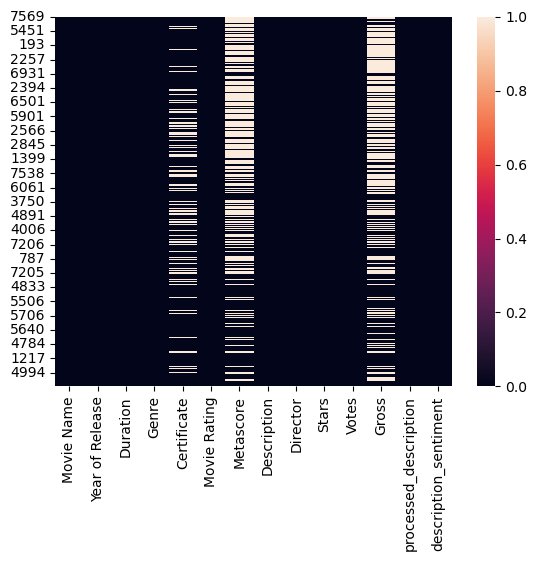

In [27]:
sns.heatmap(ds.isnull());

#### Droping Duplicates

In [28]:
ds.drop_duplicates(inplace=True)
ds.shape

C:\Users\Tirum\AppData\Local\Temp\ipykernel_10924\1987009004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop_duplicates(inplace=True)


(7584, 14)

#### Imputation(Handling null values)

##### Filling "nan" values with mode value

In [29]:
# Null values in certificate is '1736' among set of '7586' as null values count is medium,as futher imputation may doesn't cause any misclassification and error rate  
ds['Certificate'] = ds['Certificate'].fillna(list(ds['Certificate'].mode())[0])

C:\Users\Tirum\AppData\Local\Temp\ipykernel_10924\3331186248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Certificate'] = ds['Certificate'].fillna(list(ds['Certificate'].mode())[0])


In [30]:
# Null values in genre is '1' , so it is possible and easy to handle null values
ds['Genre'] = ds['Genre'].fillna(list(ds['Genre'].mode())[0].strip())

C:\Users\Tirum\AppData\Local\Temp\ipykernel_10924\3980634288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Genre'] = ds['Genre'].fillna(list(ds['Genre'].mode())[0].strip())


##### Filling "nan" values with mean value

In [31]:
# Null values in duration is '1', so it is possible and easy to handle null values
ds['Duration'] = ds['Duration'].fillna(ds['Duration'].mean())

C:\Users\Tirum\AppData\Local\Temp\ipykernel_10924\4182041360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Duration'] = ds['Duration'].fillna(ds['Duration'].mean())


In [32]:
# As 'Metascore','Gross' posses null values greater than average of total 7586 entries ,so futher imputation could arise higher error rate and misclassification
# Dropping columns which are having greater null values
ds = ds.drop(columns=['Metascore'])
ds['Gross'] = ds['Gross'].fillna(0)

In [33]:
ds.isnull().sum()

Movie Name               0
Year of Release          0
Duration                 0
Genre                    0
Certificate              0
Movie Rating             0
Description              0
Director                 0
Stars                    0
Votes                    0
Gross                    0
processed_description    0
description_sentiment    0
dtype: int64

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [37]:
# Apply remove_stopwords to the specified columns
columns_to_process = ['Movie Name', 'Description']
ds[columns_to_process] = ds[columns_to_process].applymap(remove_stopwords)

In [38]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# Function to perform lemmatization on a given text
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [40]:
# Applying lemmatization to the 'Description' column
ds['Description'] = ds['Description'].apply(lemmatize_text)

In [41]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
# futher analysis will be done on below five features
cer = ds['Certificate'].value_counts()
rat = ds['Movie Rating'].value_counts()
gen = ds['Genre'].value_counts()
dirc = ds['Director'].value_counts()
star = ds['Stars'].value_counts()
sentiments = ds['description_sentiment'].value_counts()
print(f'{cer}\n\n {rat}\n\n {gen}\n\n {dirc}\n\n {star}\n\n {sentiments}')

R            3352
Not Rated    1523
PG            574
PG-13         543
Approved      534
Passed        482
G             199
Unrated       178
TV-MA          45
GP             34
TV-14          28
TV-PG          26
NC-17          23
TV-G           12
M              12
M/PG            6
X               5
16+             3
TV-13           2
TV-Y7-FV        1
13+             1
18+             1
Name: Certificate, dtype: int64

 7.5    773
7.3    661
7.4    654
7.6    638
7.2    638
7.1    606
7.0    512
7.7    493
7.8    390
6.9    341
7.9    277
8.0    248
8.1    219
6.8    212
6.7    179
8.2    132
6.6    114
8.3     91
6.5     86
8.4     54
8.5     49
6.4     47
8.6     32
8.7     23
6.2     22
6.1     17
6.3     16
8.8     14
8.9     11
6.0      8
9.0      7
5.8      3
5.3      3
9.2      2
5.9      2
9.4      2
5.6      2
5.5      1
9.5      1
9.3      1
5.1      1
5.4      1
4.8      1
Name: Movie Rating, dtype: int64

 Drama                                 1124
Drama Romance      

###### Features 'Certificate','Movie Rating','Genre','Director' ,'Stars'  and 'description_sentiment' are holding Categorical Data , which are futher taken to visualization ,processing and predictions

In [42]:
#ds = ds.drop(columns = ['Description'])

In [43]:
#!pip install bokeh

In [44]:
#!pip install plotly

In [45]:
import plotly.express as px
column_names = ['Genre','Certificate','Movie Rating','Director','Stars','description_sentiment']
# Assuming 'column_names' is a list of column names
for column_name in column_names:
    fig = px.histogram(ds, x=column_name, nbins=50, title=f'Histogram of {column_name}')
    fig.show()


In [46]:
ds = ds.sort_index()

In [47]:
# Assuming 'Movie Rating' is the column with the genres in your DataFrame ds
counts = ds['Movie Rating'].value_counts()

# Get the Movie Rating with a count of more than 20
Movie_Rating_20 = counts[counts > 20]

print(Movie_Rating_20)

7.5    773
7.3    661
7.4    654
7.2    638
7.6    638
7.1    606
7.0    512
7.7    493
7.8    390
6.9    341
7.9    277
8.0    248
8.1    219
6.8    212
6.7    179
8.2    132
6.6    114
8.3     91
6.5     86
8.4     54
8.5     49
6.4     47
8.6     32
8.7     23
6.2     22
Name: Movie Rating, dtype: int64


In [48]:
# Assuming 'Director' is the column with the genres in your DataFrame ds
counts = ds['Director'].value_counts()

# Get the genres with a count of more than 200
Director_over_20 = counts[counts > 20]

print(Director_over_20)

Fritz Lang          29
Martin Scorsese     26
Woody Allen         25
Ingmar Bergman      24
Michael Curtiz      24
Satyajit Ray        24
William Wyler       23
Alfred Hitchcock    22
Yasujirô Ozu        22
Luis Buñuel         21
                    21
John Ford           21
Name: Director, dtype: int64


In [49]:
# Assuming 'Stars' is the column with the genres in your DataFrame ds
counts = ds['Stars'].value_counts()

# Get the stars with a count of more than 15
stars_over_15 = counts[counts > 15]

print(stars_over_15)

Burt Lancaster          26
Bette Davis             26
Cary Grant              26
James Stewart           25
John Wayne              25
Humphrey Bogart         23
Spencer Tracy           22
Gregory Peck            21
Paul Newman             20
Jean Gabin              20
Robert De Niro          20
Marcello Mastroianni    19
Clint Eastwood          19
Gary Cooper             19
Tom Hanks               17
Woody Allen             16
Marlon Brando           16
James Cagney            16
Al Pacino               16
Toshir Mifune           16
Name: Stars, dtype: int64


In [50]:
# Assuming 'Certificate' is the column with the genres in your DataFrame ds
counts = ds['Certificate'].value_counts()

# Get the certificate with a count of more than 400
certifi_over_400 = counts[counts > 400]

print(certifi_over_400)

R            3352
Not Rated    1523
PG            574
PG-13         543
Approved      534
Passed        482
Name: Certificate, dtype: int64


In [51]:
# Genre
# Assuming 'Genre' is the column with the genres in your DataFrame ds
counts = ds['Genre'].value_counts()

# Get the genres with a count of more than 100
genres_over_100 = counts[counts > 100]

print(genres_over_100)

Drama                                  1124
Drama Romance                           494
Comedy Drama                            353
Comedy Drama Romance                    269
Comedy                                  225
Crime Drama                             175
Drama War                               161
Documentary                             148
Crime Drama Thriller                    147
Crime Drama Film-Noir                   121
Crime Drama Mystery                     113
Comedy Romance                          110
Action Crime Drama                      110
Biography Drama History                 107
Drama Thriller                          102
Name: Genre, dtype: int64


In [52]:
high_rmovie = []
for index, rating in enumerate(ds['Movie Rating']):
    if rating > 7.0:
        print(f"Index: {index}, Movie Rating: {rating}")
        high_rmovie.append(index)  # Append the index to the list if needed


Index: 0, Movie Rating: 8.2
Index: 1, Movie Rating: 7.3
Index: 2, Movie Rating: 7.3
Index: 3, Movie Rating: 7.7
Index: 4, Movie Rating: 7.2
Index: 5, Movie Rating: 7.2
Index: 6, Movie Rating: 8.0
Index: 7, Movie Rating: 7.3
Index: 8, Movie Rating: 7.1
Index: 9, Movie Rating: 8.2
Index: 10, Movie Rating: 8.0
Index: 11, Movie Rating: 7.8
Index: 12, Movie Rating: 7.6
Index: 13, Movie Rating: 7.6
Index: 14, Movie Rating: 7.8
Index: 15, Movie Rating: 7.5
Index: 16, Movie Rating: 8.1
Index: 17, Movie Rating: 8.0
Index: 18, Movie Rating: 8.0
Index: 19, Movie Rating: 7.2
Index: 20, Movie Rating: 8.0
Index: 21, Movie Rating: 7.6
Index: 22, Movie Rating: 8.2
Index: 23, Movie Rating: 7.7
Index: 24, Movie Rating: 7.9
Index: 25, Movie Rating: 7.8
Index: 26, Movie Rating: 7.9
Index: 27, Movie Rating: 7.5
Index: 28, Movie Rating: 8.1
Index: 29, Movie Rating: 7.5
Index: 30, Movie Rating: 7.8
Index: 31, Movie Rating: 7.6
Index: 32, Movie Rating: 7.8
Index: 33, Movie Rating: 8.1
Index: 35, Movie Rating:

### Filtering Methods
##### (using 'Movie Rating' & 'Director' )

In [53]:
# Assuming 'Stars' is the column with stars in your DataFrame ds
# Assuming both Movie_Rating_20 and Director_over_20 are already calculated

# Create boolean masks for filtering
mask_rating = ds['Movie Rating'].isin(high_rmovie)
mask_director = ds['Director'].isin(Director_over_20.index)

# Apply boolean indexing to get rows where both conditions are met
filtered_ds = ds[mask_rating & mask_director]

# Display the resulting DataFrame
print(filtered_ds[['Movie Rating', 'Director', 'Movie Name','Stars']])


      Movie Rating          Director                     Movie Name  \
135            7.0  Alfred Hitchcock                       Sabotage   
282            7.0        Fritz Lang                    Clash Night   
358            7.0         John Ford                     Rio Grande   
363            8.0       Luis Buñuel            Exterminating Angel   
443            8.0     William Wyler                  Roman Holiday   
462            8.0      Yasujirô Ozu               Autumn Afternoon   
491            8.0    Ingmar Bergman                          Shame   
493            8.0    Ingmar Bergman                   Winter Light   
494            8.0    Ingmar Bergman                  Virgin Spring   
495            8.0    Ingmar Bergman               Cries & Whispers   
535            8.0      Satyajit Ray                       Stranger   
536            8.0      Satyajit Ray                Distant Thunder   
1295           8.0       Woody Allen                     Annie Hall   
1477  

Here we have extracted Stars,Movie names with minimum of movie rating '7.0' and directors with frequency count of minimum '20'.

This is one of the way to extract valuable information from the dataset by Filtering the Features and values with it....

# Data Visualization

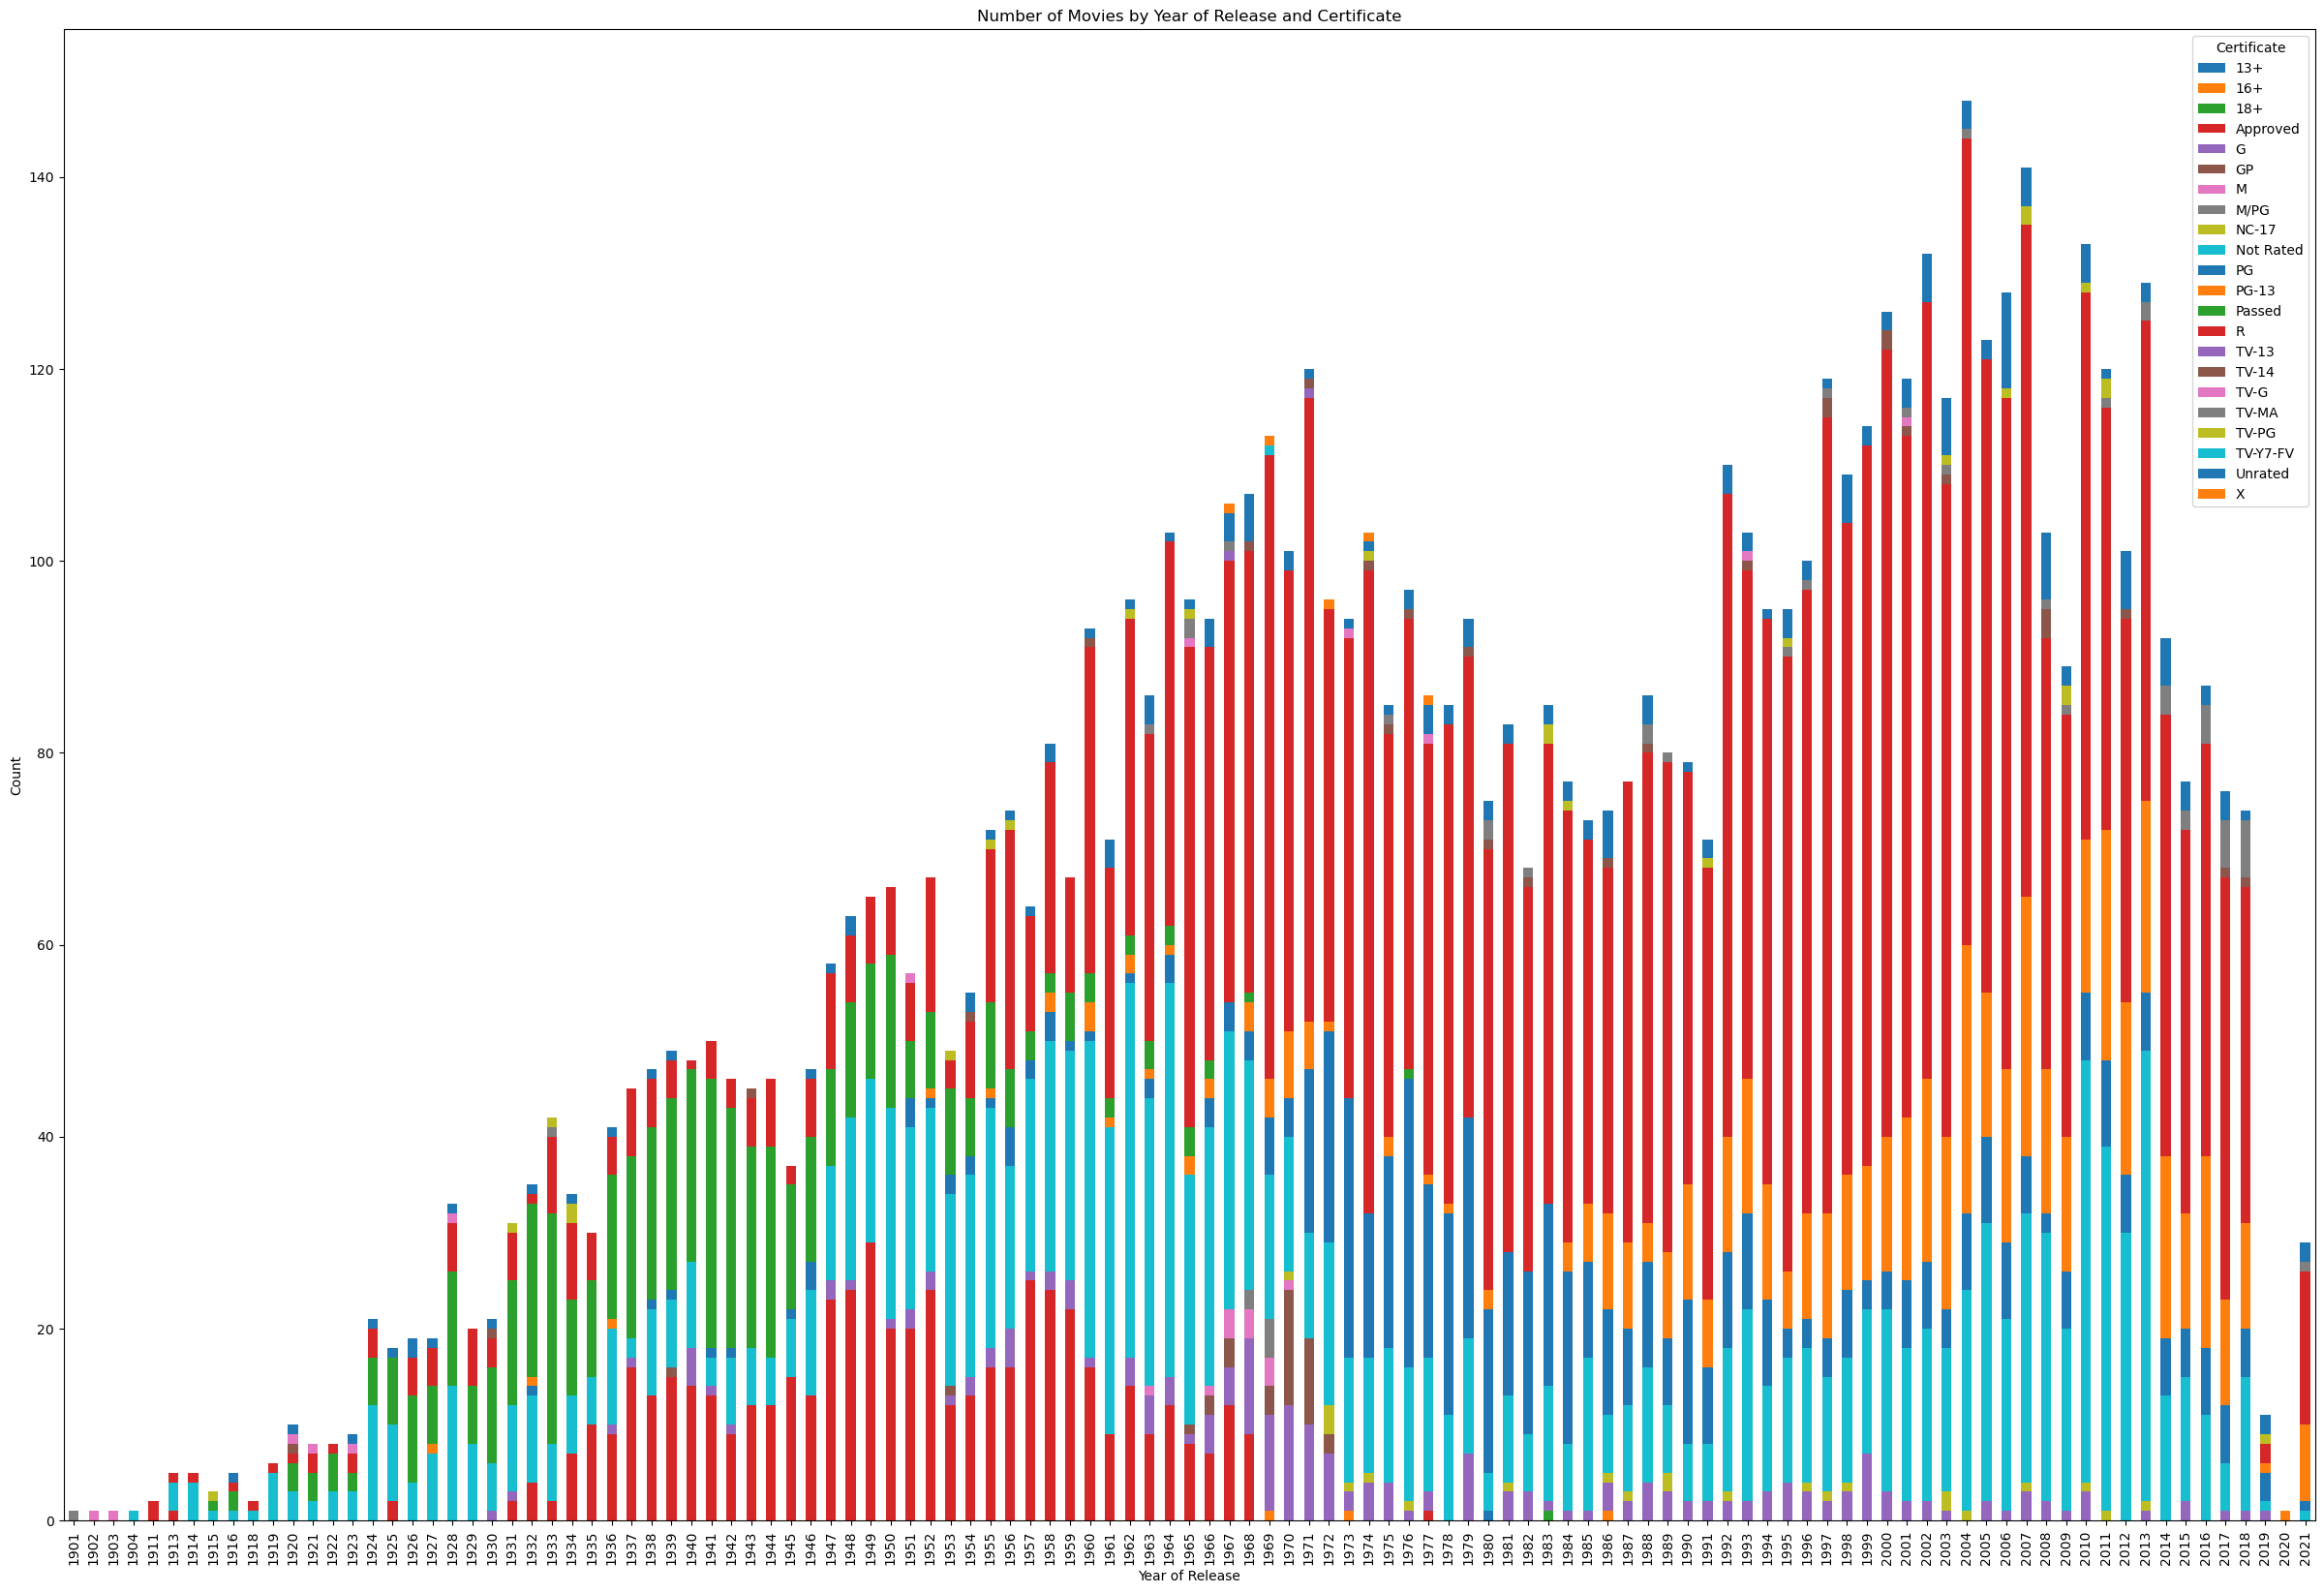

In [54]:
# Group by 'Year of Release' and 'Certificate' and count the number of movies in each group
grouped = ds.groupby(['Year of Release', 'Certificate']).size()

# Unstack the grouped DataFrame and plot it
grouped.unstack().plot(kind='bar', stacked=True, figsize=(30,20))

plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.title('Number of Movies by Year of Release and Certificate')

plt.show()


1).Increase in Movie Production: There’s a significant increase in movie production from around 1990 onwards. This could be due to advancements in technology and the growth of the film industry.

2).Dominance of “R” Rated Movies: “R” rated movies (represented by red bars) have been consistently high in number every year. This suggests that movies with “R” rating are popular among filmmakers.

3).Variety of Certificates Over Time: Over the years, the variety of certificates for movies has increased, indicating a diversification in the types of content being produced.

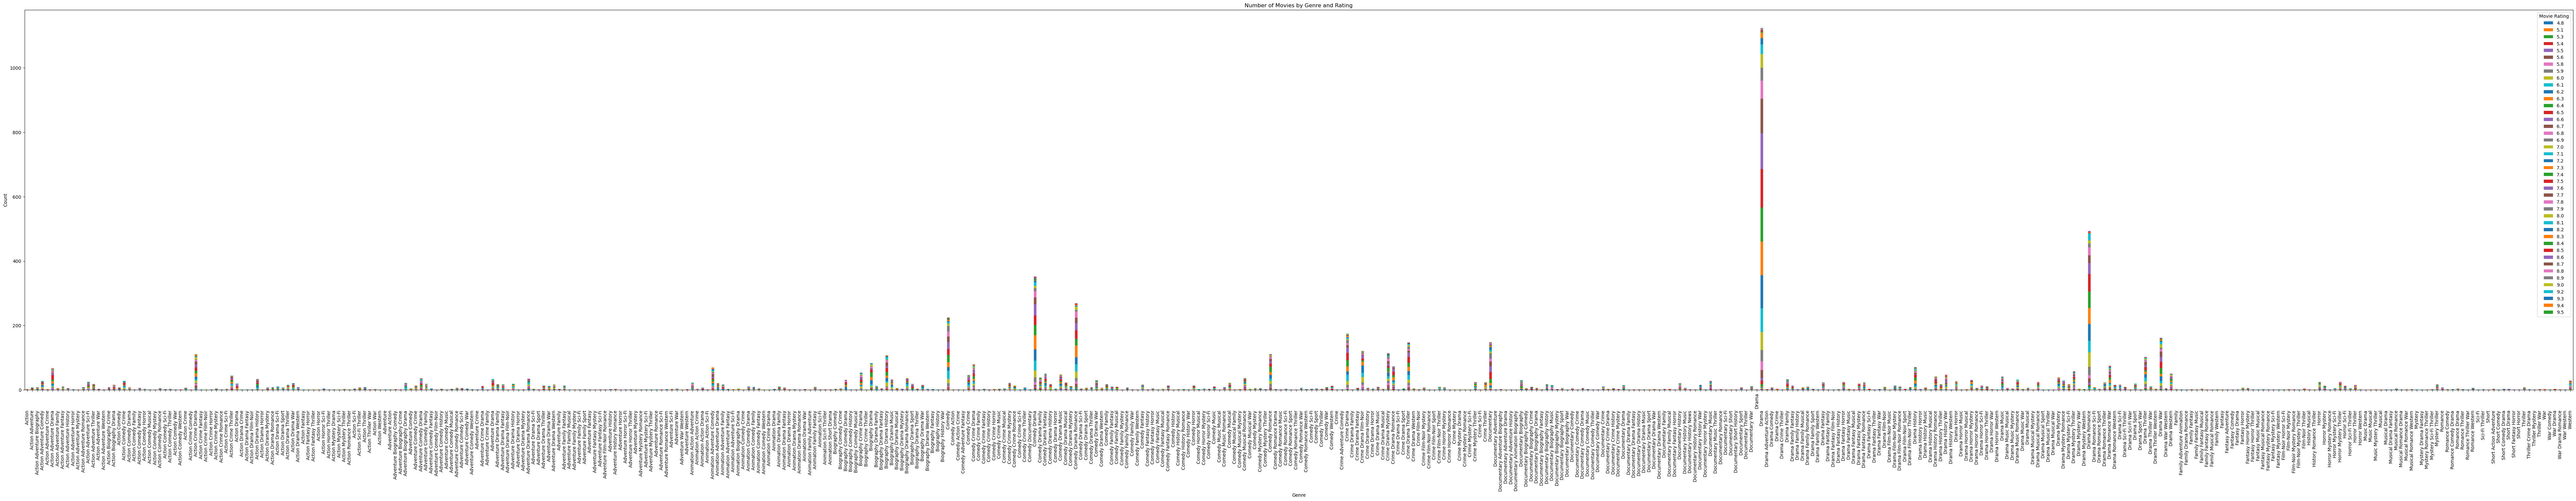

In [55]:
# Group by 'Genre' and 'Rating' and count the number of movies in each group
grouped = ds.groupby(['Genre', 'Movie Rating']).size()

# Unstack the grouped DataFrame and plot it
grouped.unstack().plot(kind='bar', stacked=True, figsize=(100,15))

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies by Genre and Rating')

plt.show()


Drama                                  1125

Drama Romance                           494

Comedy Drama                            354

Comedy Drama Romance                    269

Comedy                                  225

Crime Drama                             175

Drama War                               161 

( reported as higher no.of frequency )

In [56]:
import plotly.express as px

# Assuming 'ds' is your DataFrame and 'certifi_over_400' is a Series with certificate counts over 400
fig = px.pie(certifi_over_400, values=certifi_over_400.values, names=certifi_over_400.index, title='Distribution of Certificates')
fig.show()


1).R-rated Dominance: The majority of the movies in your dataset (47.8%) are R-rated. This suggests a significant amount of adult content.

2).Not Rated Movies: The second largest segment is movies that are not rated, making up 21.7% of your dataset. This could indicate a large number of older or independent films that haven’t been officially rated.

## DATA EXPLORATION
DATA GROSS IN YEARS¶

In [57]:
import plotly.graph_objects as go
gross_year = ds.groupby('Year of Release')['Gross'].sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=gross_year.index, y=gross_year.values,
                    mode='lines',marker_color='blue',name='Gross income by Year'))


fig.update_layout(title_text='Money Statistics')
fig.add_annotation(
            x=2020,
            y=gross_year.values.max(),
            text="Peak")

fig.show()


Becasue of presence of many null values in Gross feature ,encountered the improper graph
:- above graphs give information about trend of no.of movies released on year until 2019.

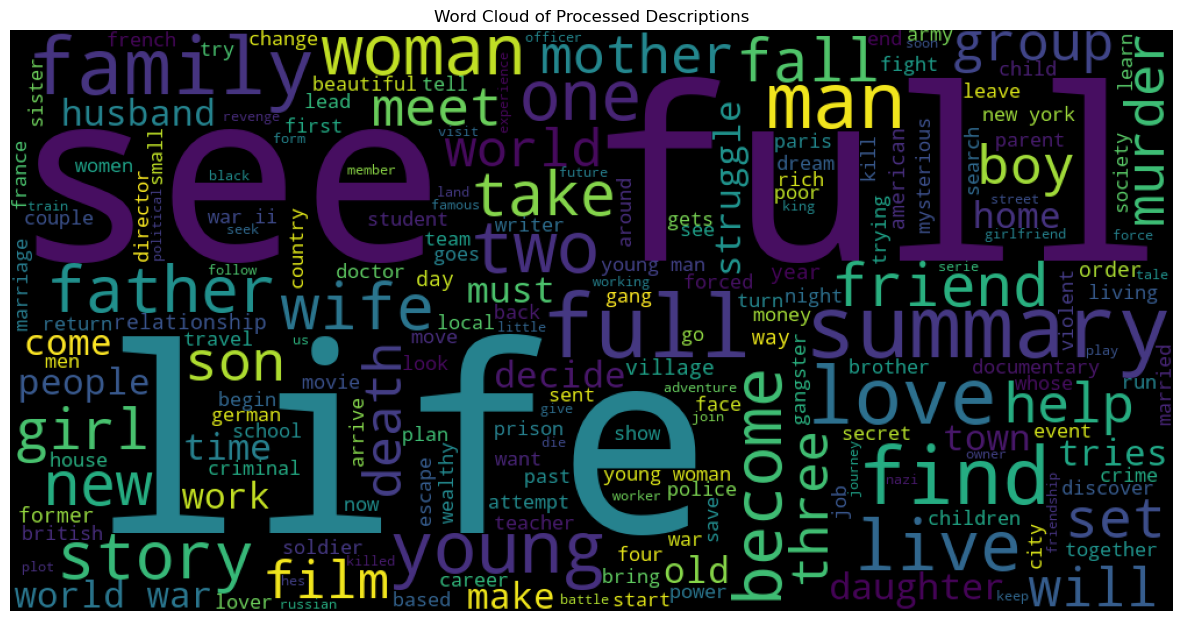

In [58]:
# Processed Description and Sentiment
# For word cloud, you need the wordcloud library. You can install it using pip install wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(ds['processed_description']))
plt.imshow(wordcloud)
plt.title('Word Cloud of Processed Descriptions')
plt.axis("off")
plt.show()

## 1)how many movies reased in each year?

In [59]:
ds['Year of Release'].value_counts().sort_index()

1901     1
1902     1
1903     1
1904     1
1911     2
        ..
2017    76
2018    74
2019    11
2020     1
2021    29
Name: Year of Release, Length: 113, dtype: int64

## 2)which are the top rated movies in data?

In [60]:
# Sort the DataFrame by 'Movie Rating' column in descending order
top_rated_movies = ds.sort_values(by='Movie Rating', ascending=False)
top_rated_movies.head()[['Movie Name', 'Movie Rating']]

Movie Name  Movie Rating
817                 Svet Koji Nestaje           9.5
816   Disappearing Oasis , Last Oasis           9.4
1494                    Band Brothers           9.4
1222             Shawshank Redemption           9.3
3371                      Chaos Class           9.2

## 3)In which year more movies released?

In [61]:
released_years = ds['Year of Release'].value_counts().head()
released_years

2004    148
2007    141
2010    133
2002    132
2013    129
Name: Year of Release, dtype: int64

## 4)Which movies have the highest gross income?

In [62]:
# Use nlargest to get the top 5 movies based on 'Gross' income
top_grossing_movies = ds.nlargest(5, 'Gross')
top_grossing_movies.head()[['Movie Name', 'Gross']]

Movie Name   Gross
7473      Incredibles 2  608.58
7308        Dark Knight  534.86
7390  Dark Knight Rises  448.14
902             Shrek 2  436.47
875               E.T .  435.11

## 5) Who are the top 5 directors and stars based on the average rating of their movies?

In [63]:
# Group by 'Director' and calculate the average rating for each director
avg_rating_directors = ds.groupby('Director')['Movie Rating'].mean()
top_directors = avg_rating_directors.nlargest(5)
top_directors.head()

Director
Scott Grimes, Damian Lewis, Ron Livingston    9.400000
Amitabh Reza Chowdhury                        9.000000
Petar Lalovic                                 8.966667
Ezra Edelman                                  8.900000
Henry Arnold, Salome Kammer, Frank Röth       8.900000
Name: Movie Rating, dtype: float64

In [64]:
# Group by 'Stars' and calculate the average rating for each star
avg_rating_stars = ds.groupby('Stars')['Movie Rating'].mean()

top_stars = avg_rating_stars.nlargest(5)
top_stars.head()

Stars
Petar Kralj           9.5
Shane Taylor          9.4
Zoran Radmilovic      9.4
Chanchal Chowdhury    9.0
Max Freeman           9.0
Name: Movie Rating, dtype: float64

## 6)How many movies are there in top 5 genre?

In [65]:
# Use value_counts to count the number of movies in each genre
movies_per_genre = ds['Genre'].value_counts()
movies_per_genre.head()

Drama                               1124
Drama Romance                        494
Comedy Drama                         353
Comedy Drama Romance                 269
Comedy                               225
Name: Genre, dtype: int64

## 7)which movie get highest number of votes?

In [66]:
movies = ds.sort_values(by='Votes', ascending=False).head(5)
movies[['Movie Name', 'Votes']]

Movie Name    Votes
1222  Shawshank Redemption  2834804
7308           Dark Knight  2816111
7309             Inception  2499873
1137            Fight Club  2270583
3619          Forrest Gump  2209438

# encodeng -vectorizerization and Cosine similarities

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
# selecting the relevant features for recommendation
selected_features = ['Genre','Director','Stars','Description']
print(selected_features)

['Genre', 'Director', 'Stars', 'Description']


In [69]:
# replacing the null valuess with null string
for feature in selected_features:
    ds[feature] = ds[feature].fillna('')

In [70]:
combined_features= ds['Genre'].astype(str) + ' ' + ds['Director'].astype(str) + ' ' + ds['Stars'].astype(str) + ' ' + ds['Description'].astype(str)

In [71]:
print(combined_features)

0       Short Action Adventure             Georges Mél...
1       Short Action Adventure             Edwin S. Po...
2       Action Adventure Crime             Louis Feuil...
3       Drama History             D.W. Griffith Lillia...
4       Adventure Crime             Louis Feuillade Re...
                              ...                        
7581    Drama             August Blom Olaf Fnss Dr. Fr...
7582    Comedy Drama Mystery             Jason Reitman...
7583    Action Comedy             Jim Abrahams Charlie...
7584    Drama             Robert Siodmak Harry Baur Ju...
7585    Crime Drama Thriller             Jules Dassin ...
Length: 7584, dtype: object


In [72]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [73]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [74]:
print(feature_vectors)

  (0, 14934)	0.32963860095343434
  (0, 7470)	0.29254224292614245
  (0, 8964)	0.17567473258684363
  (0, 1637)	0.33701995439470284
  (0, 9284)	0.1814913823876813
  (0, 14786)	0.34605400088571353
  (0, 15241)	0.34605400088571353
  (0, 8737)	0.5374909791051894
  (0, 603)	0.13492546141232842
  (0, 492)	0.13724601220350785
  (0, 20260)	0.2508577325377414
  (1, 9844)	0.27803080556024246
  (1, 10253)	0.23293849590715185
  (1, 17365)	0.237281901661013
  (1, 5888)	0.19277568400425446
  (1, 7957)	0.11510299742119161
  (1, 23185)	0.20233091822594554
  (1, 10123)	0.21249160012782428
  (1, 22535)	0.18018387547122258
  (1, 3063)	0.30057696038678783
  (1, 21015)	0.20313410041026128
  (1, 2020)	0.20842039032020682
  (1, 1097)	0.21039234108060653
  (1, 2583)	0.20154709172548535
  (1, 3192)	0.30057696038678783
  :	:
  (7582, 7584)	0.21296186294605438
  (7582, 21524)	0.20633807879081245
  (7582, 9679)	0.19843199962648675
  (7582, 1432)	0.22844976901268807
  (7582, 24092)	0.12715168090088713
  (7582, 24416

In [75]:
#Cosine Similarity Calculation
cosine_sim = cosine_similarity(feature_vectors, feature_vectors)

In [76]:
# Movie Recommendation Function by Movie Name
def recommend_movies_by_name(movie_name, cosine_sim=cosine_sim, ds=ds):
    # Check if the movie name exists in the DataFrame
    if movie_name in ds['Movie Name'].values:
        # Find the index of the movie with the given name
        movie_index = ds.index[ds['Movie Name'] == movie_name].tolist()[0]

        # Get the cosine similarity scores for the given movie index
        sim_scores = list(enumerate(cosine_sim[movie_index]))

        # Sort movies based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of recommended movies
        recommended_indices = [index for index, score in sim_scores[1:11]]  # Exclude the movie itself

        # Return recommended movies
        return ds.iloc[recommended_indices][['Movie Name','Year of Release', 'Description','Genre']]
    else:
        return f"Movie '{movie_name}' not found in the dataset."


In [77]:
#Recommend movies for a specific movie name (change 'movie_name' to the name you want)
movie_name = 'Dark Knight'  # Change this to the name of the movie you want recommendations for
recommendations = recommend_movies_by_name(movie_name)
                               


# Print the recommendations
print(f"Recommended Movies for __{movie_name}__\n-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-")
print(recommendations)

Recommended Movies for __Dark Knight__
-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-`-
                    Movie Name  Year of Release  \
5164                  Prestige             2006   
6747  X-Men : Days Future Past             2014   
7384              Interstellar             2014   
1791                  Revenant             2015   
7415                  n't Look             2021   
7386                     Tenet             2020   
7315             Batman Begins             2005   
1729                   Memento             2000   
4693             Blood Diamond             2006   
933                   Superman             1978   

                                            Description  \
5164  tragic accident , two stage magician 1890s Lon...   
6747  X-Men send Wolverine past desperate effort cha...   
7384  Earth becomes uninhabitable future , farmer ex...   
1791  frontiersman fur trading expedition 1820s figh...   
7415  Two low-level astronomer must go giant medium ...   
7386 

In [78]:
import pickle

In [79]:
pickle.dump(recommendations,open('movies_list.pkl','wb'))

In [80]:
pickle.dump(cosine_sim,open('similarity.pkl','wb'))

In [81]:
pickle.load(open('movies_list.pkl','rb'))

Movie Name  Year of Release  \
5164                  Prestige             2006   
6747  X-Men : Days Future Past             2014   
7384              Interstellar             2014   
1791                  Revenant             2015   
7415                  n't Look             2021   
7386                     Tenet             2020   
7315             Batman Begins             2005   
1729                   Memento             2000   
4693             Blood Diamond             2006   
933                   Superman             1978   

                                            Description  \
5164  tragic accident , two stage magician 1890s Lon...   
6747  X-Men send Wolverine past desperate effort cha...   
7384  Earth becomes uninhabitable future , farmer ex...   
1791  frontiersman fur trading expedition 1820s figh...   
7415  Two low-level astronomer must go giant medium ...   
7386  Armed one word , Tenet , fighting survival ent...   
7315  witnessing parent ' death , Bruce learns art f...   
1729  man short-term memory loss attempt track wife ...   
4693  fisherman , smuggler , syndicate businessmen m...   
933   alien orphan sent dying planet Earth , grows b...   

                                     Genre  
5164      Drama Mystery Sci-Fi              
6747   Action Adventure Sci-Fi              
7384    Adventure Drama Sci-Fi              
1791    Action Adventure Drama              
7415       Comedy Drama Sci-Fi              
7386    Action Sci-Fi Thriller              
7315        Action Crime Drama              
1729          Mystery Thriller              
4693  Adventure Drama Thriller              
933    Action Adventure Sci-Fi

In [82]:
df = pd.DataFrame(ds)

# Save the DataFrame as a CSV file
df.to_csv('movies_dataset.csv', index=False)

In [83]:
ds

Movie Name  Year of Release  Duration  \
0               Trip Moon             1902      13.0   
1     Great Train Robbery             1903      11.0   
2            Les vampires             1915     421.0   
3             Intolerance             1916     163.0   
4                   Judex             1916     300.0   
...                   ...              ...       ...   
7581             Atlantis             1913     121.0   
7582                Tully             2018      95.0   
7583          Hot Shots !             1991      84.0   
7584               Hatred             1938      67.0   
7585               Rififi             1955     118.0   

                                   Genre Certificate  Movie Rating  \
0     Short Action Adventure                    TV-G           8.2   
1     Short Action Adventure                    TV-G           7.3   
2     Action Adventure Crime               Not Rated           7.3   
3              Drama History                  Passed           7.7   
4            Adventure Crime               Not Rated           7.2   
...                                  ...         ...           ...   
7581                   Drama                       R           6.5   
7582    Comedy Drama Mystery                       R           6.9   
7583           Action Comedy                   PG-13           6.7   
7584                   Drama                       R           7.4   
7585    Crime Drama Thriller               Not Rated           8.1   

                                            Description         Director  \
0                 group astronomer go expedition Moon .   Georges Méliès   
1     group bandit stage brazen train hold-up , find...  Edwin S. Porter   
2     intrepid reporter loyal friend battle bizarre ...  Louis Feuillade   
3     story poor young woman separated prejudice hus...    D.W. Griffith   
4     twelve-part serial following adventure masked ...  Louis Feuillade   
...                                                 ...              ...   
7581  Dr. Friedrich 's wife becomes mentally unstabl...      August Blom   
7582  struggling mother three form unexpected bond n...    Jason Reitman   
7583  parody Top Gun ( 1986 ) talented unstable figh...     Jim Abrahams   
7584  Justin Mollenard sailor arm smuggler support h...   Robert Siodmak   
7585  Four men plan technically perfect crime , huma...     Jules Dassin   

                                  Stars   Votes  Gross  \
0                          Georges Mlis   54487   0.00   
1     Gilbert M. Broncho Billy Anderson   20603   0.00   
2                              Musidora    5331   0.00   
3                          Lillian Gish   16521   2.18   
4                             Ren Crest    1109   0.00   
...                                 ...     ...    ...   
7581                          Olaf Fnss     462   0.00   
7582                    Charlize Theron   62366   9.23   
7583                      Charlie Sheen  114859  69.47   
7584                         Harry Baur     323   0.00   
7585                       Jean Servais   36383   0.06   

                                  processed_description description_sentiment  
0     a group of astronomers go on an expedition to ...               neutral  
1     a group of bandits stage a brazen train holdup...          low positive  
2     an intrepid reporter and his loyal friend batt...          low positive  
3     the story of a poor young woman separated by p...          low negative  
4     a twelvepart serial following the adventures o...          low negative  
...                                                 ...                   ...  
7581  after dr friedrichs wife becomes mentally unst...          low negative  
7582  a struggling mother of three forms an unexpect...          low positive  
7583  a parody of top gun 1986 in which a talented b...         high positive  
7584  justin mollenard is a sailor and arms smuggler...         high positive  
7585  four 